In [42]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('titanic.csv')

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.dropna(inplace=True)

In [40]:
%matplotlib inline

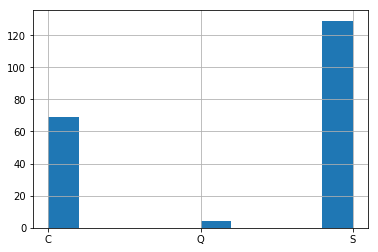

In [41]:
data.Embarked.hist()

In [43]:
new_columns = {
    'C': [],
    'Q': [],
    'S': []
}

for val in data.Embarked:
    if val == 'C':
        new_columns['C'].append(1)
        new_columns['Q'].append(0)
        new_columns['S'].append(0)
    elif val == 'Q':
        new_columns['C'].append(0)
        new_columns['Q'].append(1)
        new_columns['S'].append(0)
    else:
        new_columns['C'].append(0)
        new_columns['Q'].append(0)
        new_columns['S'].append(1)
        
data['C'] = np.array(new_columns['C'])
data['Q'] = np.array(new_columns['Q'])
data['S'] = np.array(new_columns['S'])

In [46]:
data['bin_sex'] = np.array([1 if val == 'male' else 0 for val in data.Sex])

In [47]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,bin_sex
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,0,1,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C,1,0,0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1,0,0,0


In [48]:
del data['PassengerId']
del data['Name']
del data['Sex']
del data['Ticket']
del data['Cabin']
del data['Embarked']

In [49]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,bin_sex
1,1,1,38.0,1,0,71.2833,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,1,1
10,1,3,4.0,1,1,16.7000,0,0,1,0
11,1,1,58.0,0,0,26.5500,0,0,1,0


In [50]:
y = data['Survived']
del data['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, y, test_size=0.2)

In [53]:
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,bin_sex
806,1,39.0,0,0,0.0000,0,0,1,1
857,1,51.0,0,0,26.5500,0,0,1,1
11,1,58.0,0,0,26.5500,0,0,1,0
75,3,25.0,0,0,7.6500,0,0,1,1
268,1,58.0,0,1,153.4625,0,0,1,0


In [54]:
Ytrain.head()

806    0
857    1
11     1
75     0
268    1
Name: Survived, dtype: int64

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
model = RandomForestClassifier(max_depth=20, n_estimators=30)

In [100]:
model.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
Xtest.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,bin_sex
745,1,70.0,1,1,71.0000,0,0,1,1
515,1,47.0,0,0,34.0208,0,0,1,1
689,1,15.0,0,1,211.3375,0,0,1,0
88,1,23.0,3,2,263.0000,0,0,1,0
776,3,28.0,0,0,7.7500,0,1,0,1


In [112]:
prediction = model.predict_proba(Xtest)

In [113]:
prediction[:5]

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.13333333, 0.86666667],
       [0.36666667, 0.63333333],
       [0.86666667, 0.13333333]])

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [105]:
accuracy_score(prediction, Ytest)

0.7560975609756098

In [106]:
precision_score(prediction, Ytest)

0.7666666666666667

In [107]:
recall_score(prediction, Ytest)

0.8846153846153846

In [31]:
Ytest.mean()

0.3407821229050279